In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 9, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product',
        'Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']

# 1. DATA CLEANSING

In [5]:
df = pd.read_csv('Train.csv')
df_awal = pd.read_csv('Train.csv')

In [6]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
8269,8270,F,Ship,7,4,286,4,low,M,3,1262,1
4051,4052,F,Ship,6,3,144,7,high,F,8,5646,1
3870,3871,D,Ship,3,2,211,3,high,M,7,4145,1
358,359,C,Ship,3,1,140,3,medium,F,65,1291,1
10146,10147,D,Flight,6,3,289,5,medium,F,1,1949,1


## A. Handle Missing Values

In [8]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Tidak ada missing values

## B. Handle Duplicated Data

In [10]:
df[nums].duplicated().sum()

0

Tidak ada data yang duplicated

## C. Handle Outliers

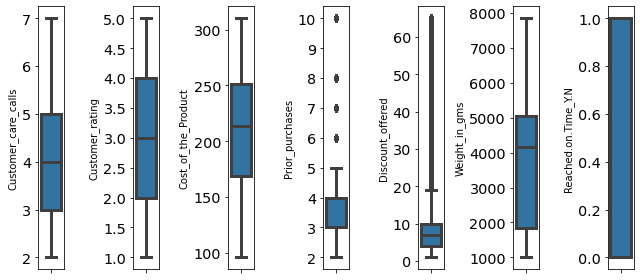

In [11]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()
    plt.savefig('boxplot_outlier1')

<h2>Terdapat Outlier pada Features Prior Purchases dan Discount Offered. Maka akan dilakukan penghapusan outlier dengan menggunakan IQR</h2>

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in ['Prior_purchases']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 9996


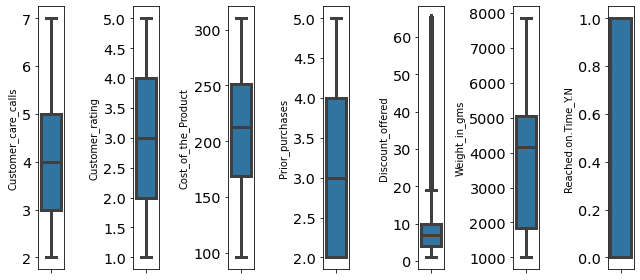

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()
    plt.savefig('boxplot_outlier2')

<h3> Setelah dilakukan hapus outlier dengan IQR masih terdapat outlier di Discount offered maka akan dilakukan Feature Transformation agar persebaran mendekati normal</h3>

## D. Feature Transformation

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

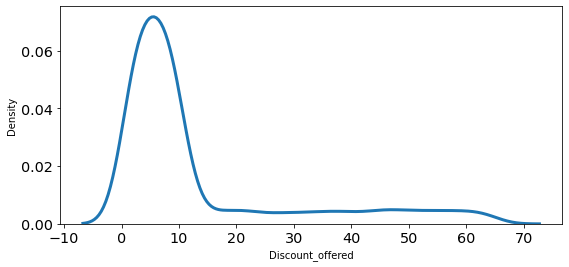

In [14]:
sns.kdeplot(df['Discount_offered'])

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

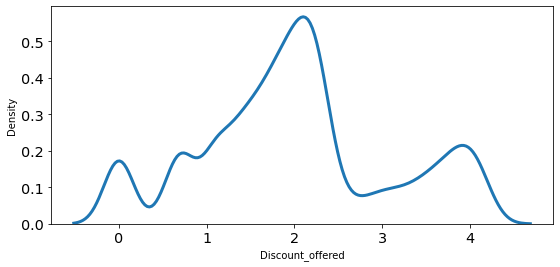

In [15]:
sns.kdeplot(np.log(df['Discount_offered']))

<h3>Setelah di Log Transformation</h3>

In [16]:
df['Log_Discount_offered'] = np.log(df['Discount_offered'])
df[['Discount_offered','Log_Discount_offered']].describe()

,Discount_offered,Log_Discount_offered
count,9996.000000,9996.000000
mean,13.442977,2.002975
std,16.249371,1.085346
min,1.000000,0.000000
25%,4.000000,1.386294
50%,7.000000,1.945910
75%,10.000000,2.302585
max,65.000000,4.174387


Menunjukkan perbedaan Discount_offered sebelum dan setelah di Log Transformation

## E. Feature Encoding

Terdapat 4 Feature yang akan di Encoding yaitu
    <br>1. Warehouse_block
    <br>2. Mode_of_Shipment
    <br>3. Product_importance
    <br>4. Gender
    

In [17]:
mapping_gender = {
    'F' : 0,
    'M' : 1
}
df['Gender'] = df['Gender'].map(mapping_gender)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Log_Discount_offered
0,1,D,Flight,4,2,177,3,low,0,44,1233,1,3.784190
1,2,F,Flight,4,5,216,2,low,1,59,3088,1,4.077537
2,3,A,Flight,2,2,183,4,low,1,48,3374,1,3.871201
3,4,B,Flight,3,3,176,4,medium,1,10,1177,1,2.302585
4,5,C,Flight,2,2,184,3,medium,0,46,2484,1,3.828641


<h3>Untuk Gender menggunakan Label Encorder karena jumlah distinct values = 2. </h3>
<h3>Untuk M = 1 , F = 0</h3>

In [18]:
for cat in ['Warehouse_block','Mode_of_Shipment','Product_importance']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [19]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,1,D,Flight,4,2,177,3,low,0,44,...,0,0,1,0,1,0,0,0,1,0
1,2,F,Flight,4,5,216,2,low,1,59,...,0,0,0,1,1,0,0,0,1,0
2,3,A,Flight,2,2,183,4,low,1,48,...,0,0,0,0,1,0,0,0,1,0
3,4,B,Flight,3,3,176,4,medium,1,10,...,1,0,0,0,1,0,0,0,0,1
4,5,C,Flight,2,2,184,3,medium,0,46,...,0,1,0,0,1,0,0,0,0,1


<h3>Warehouse_block, Mode_of_Shipment,Product_importance menggunakan One Hot Encoder karena jumlah distinct  > 2 dan cocok untuk fitur non-hierarki di mana tidak ada hubungan antara satu variabel dengan variabel lainnya</h3>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10998
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         9996 non-null   int64  
 1   Warehouse_block            9996 non-null   object 
 2   Mode_of_Shipment           9996 non-null   object 
 3   Customer_care_calls        9996 non-null   int64  
 4   Customer_rating            9996 non-null   int64  
 5   Cost_of_the_Product        9996 non-null   int64  
 6   Prior_purchases            9996 non-null   int64  
 7   Product_importance         9996 non-null   object 
 8   Gender                     9996 non-null   int64  
 9   Discount_offered           9996 non-null   int64  
 10  Weight_in_gms              9996 non-null   int64  
 11  Reached.on.Time_Y.N        9996 non-null   int64  
 12  Log_Discount_offered       9996 non-null   float64
 13  Warehouse_block_A          9996 non-null   uint

In [ ]:
df.to_csv('df_new.csv')

## F. Handle Class Imbalance

<AxesSubplot:ylabel='Reached.on.Time_Y.N'>

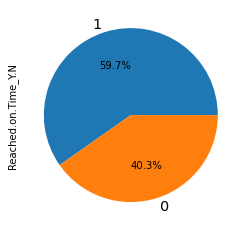

In [22]:
df['Reached.on.Time_Y.N'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [23]:
# Memisahkan Features vs Target
X = df
y = df['Reached.on.Time_Y.N'].values

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature Engineering

### A. Feature Selection

Untuk memilih feature yang akan digunakan dalam modelling, akan dilihat korelasi antara feature dengan target. Perhitungan korelasi yang digunakan menggunakan pearson correlation dan disajikan dalam matriks heatmap berikut.

<AxesSubplot:>

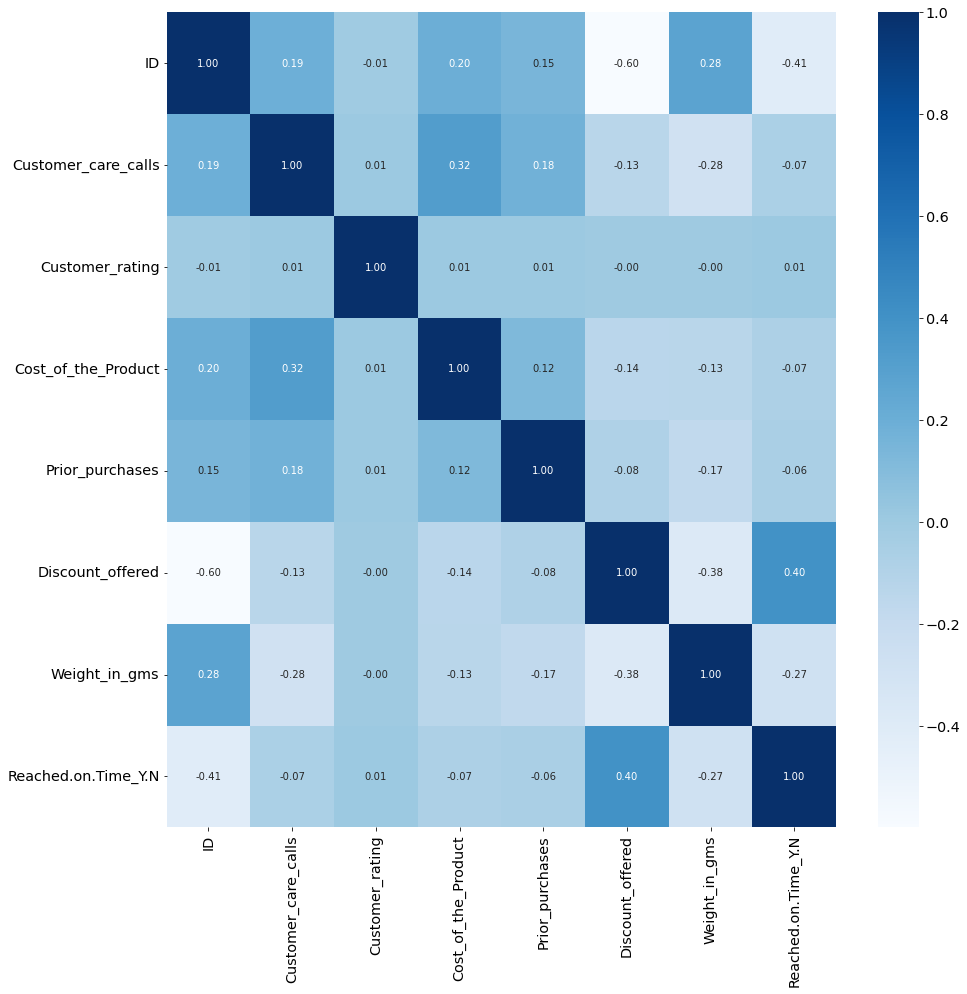

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_awal.corr(), cmap='Blues', annot=True, fmt='.2f')

Pada baris paling bawah (nilai korelasi terhadap kolom target : reached on time), terlihat hampir semua kotak cenderung berwarna biru muda, yang berarti nilainya mendekati 0. Ini menandakan bahwa hampir semua feature tidak memiliki korelasi yang kuat dengan dengan kolom target reached on time. 


### B. Feature Extraction

Membagi data discount offered ke dalam 3 kategori. Pembagian ini dilakukan karena dari EDA yang dilakukan sebelumnya discount offered positively skewed, dan memiliki banyak outlier yang sangat besar. Nilai korelasi dari discount offered paling besar dibandingkan feature lainnya yaitu 0,40. Oleh karena itu, outlier pada kolom ini tidak akan dihapus. Untuk menanganinya discount offered akan dibagi ke dalam 3 kategori menggunakan qcut.

0 : discount kecil

1 : discount sedang

2 : discount besar

In [47]:
df['Discount_offered'] = pd.qcut(df['Discount_offered'],3,labels=[0,1,2])

In [26]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,1,D,Flight,4,2,177,3,low,0,44,...,0,0,1,0,1,0,0,0,1,0
1,2,F,Flight,4,5,216,2,low,1,59,...,0,0,0,1,1,0,0,0,1,0
2,3,A,Flight,2,2,183,4,low,1,48,...,0,0,0,0,1,0,0,0,1,0
3,4,B,Flight,3,3,176,4,medium,1,10,...,1,0,0,0,1,0,0,0,0,1
4,5,C,Flight,2,2,184,3,medium,0,46,...,0,1,0,0,1,0,0,0,0,1


In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cost_of_the_Produc dan Weight_in_gms gaji kita standarisasi (karena distribusi datanya sudah mendekati normal)
df['Cost_of_the_Product_std'] = StandardScaler().fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['Weight_in_gms_std'] = StandardScaler().fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))

In [28]:
df.to_csv('df_new.csv')

### C. Feature Rekomendasi

- package size 

- distance
- apakah beda pulau
- product category
- biaya pengiriman